In [1]:
import pandas as pd

from util.model_stats import print_stats

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

C:\Users\Jakob\AppData\Local\Temp\ipykernel_12900\3437025891.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# load df

dfs = []
for i in range(5):
    df = pd.read_pickle(f"../pickle/newsGroups/BERT_EN_{i}.pkl")
    dfs.append(df)
    i = i+1

In [3]:
# print stats
print_stats(dfs, average='micro')

F1 91.076 0.3
Detection Error 8.9 0.3

AUC_ROC 90.4 0.3
AUC_PR_True 98.9 0.1
AUC_PR_False 50.1 2.2

MEAN PROB True 94.5 0.1
MEAN PROB False 68.3 0.8
MEAN PROB Range 26.200000000000003


100%|██████████| 5/5 [00:04<00:00,  1.15it/s]


0.01:  72.6
0.05:  56.1
0.1:  49.1
0.15:  41.4
0.2:  35.6
0.5:  17.2


100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

0.01:  6.1
0.05:  8.1
0.1:  8.9
0.15:  8.8
0.2:  8.7
0.5:  9.2



C:\Users\Jakob\AppData\Local\Temp\ipykernel_12900\4285881627.py:46: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


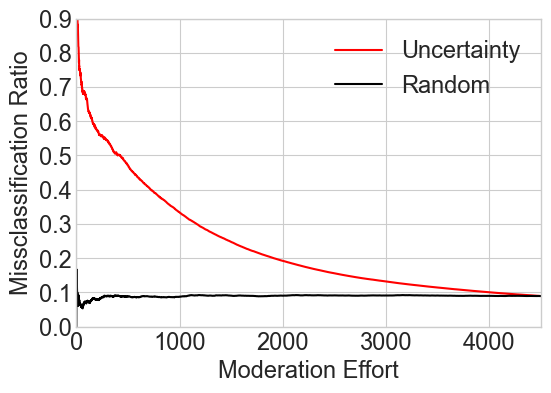

In [6]:
data = []
import numpy as np
import tqdm
from sklearn.utils import shuffle

mean = None

def ratio(array):
    true_counts = [sum(array[:i+1]) for i in range(len(array))]
    true_percentages = [(count / (i + 1)) * 100 for i, count in enumerate(true_counts)]
    data.append(true_percentages)
    mean = np.array(data).mean(axis=0)
    return mean

for df in tqdm.tqdm(dfs):
    boolean_array = df.sort_values('u_lc', ascending=False)['defect'].values
    mean = ratio(boolean_array)
    
for i in [0.01, 0.05, 0.1, 0.15, 0.2, 0.5]:
    print(f"{i}: ", round(mean[int(len(df) * i)], 1))
    
    
data = []
import numpy as np
import tqdm
from sklearn.utils import shuffle

mean_rng = None

def ratio(array):
    true_counts = [sum(array[:i+1]) for i in range(len(array))]
    true_percentages = [(count / (i + 1)) * 100 for i, count in enumerate(true_counts)]
    data.append(true_percentages)
    mean = np.array(data).mean(axis=0)
    return mean

for df in tqdm.tqdm(dfs):
    boolean_array = df.sort_values('u_lc', ascending=False)['defect'].values
    mean_rnd = ratio(shuffle(boolean_array))

for i in [0.01, 0.05, 0.1, 0.15, 0.2, 0.5]:
    print(f"{i}: ", round(mean_rnd[int(len(df) * i)], 1))
    
    
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.rc('font', size=17)
plt.rcParams["figure.figsize"] = (6,4)


plt.plot(mean / 100, 'r', label='Uncertainty',)
plt.plot(mean_rnd / 100, 'k', label='Random')

plt.yticks([0, .10, .20, .30, .40, .50, .60, .7, .8, .9]) 

# Achsenbeschriftungen und Legende hinzufügen
plt.xlabel('Moderation Effort')
plt.ylabel('Missclassification Ratio')
plt.legend()
plt.xlim(0, len(df))
plt.ylim(0, 0.9)

# Diagramm anzeigen
plt.show()